# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ahmad Maulana Rismadin
- **Email:** amrismadin@gmail.com
- **ID Dicoding:** maulanarismadin

In [5]:
import pandas as pd

# URL of the CSV file on GitHub
url = "https://raw.githubusercontent.com/rootAmr/Bike_Dataset/refs/heads/main/day.csv"

try:
    df = pd.read_csv(url)
    print("Successfully")
    print(df.head())
except Exception as e:
    print(f"error: {e}")


Successfully loaded data from GitHub.
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562 

## Menentukan Pertanyaan Bisnis

- Apa korelasi antara suhu dan jumlah total sepeda yang disewa?
- Berapa peresentasi penyewaan sepeda berbeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

In [8]:
data_day = pd.read_csv(url)
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
data_day['dteday'] = pd.to_datetime(data_day['dteday'])
data_day['season'] = data_day.season.astype('category')
data_day['mnth'] = data_day.mnth.astype('category')
data_day['holiday'] = data_day.holiday.astype('category')
data_day['weekday'] = data_day.weekday.astype('category')
data_day['workingday'] = data_day.workingday.astype('category')
data_day['weathersit'] = data_day.weathersit.astype('category')

In [11]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [12]:
data_day.describe()

,instant,dteday,yr,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


### Gathering Data

In [13]:
data_day.season.replace((1,2,3,4), ('Musim dingin', 'Musim semi', 'Musim panas', 'Musim gugur'), inplace=True)

<ipython-input-13-72a7ccc6fe5d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.season.replace((1,2,3,4), ('Musim dingin', 'Musim semi', 'Musim panas', 'Musim gugur'), inplace=True)
<ipython-input-13-72a7ccc6fe5d>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_day.season.replace((1,2,3,4), ('Musim d

In [14]:
data_day.yr.replace((0,1), (2011,2012), inplace=True)

<ipython-input-14-2970f103dfd4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.yr.replace((0,1), (2011,2012), inplace=True)


In [15]:
data_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

<ipython-input-15-85e15d71aa62>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
<ipython-input-15-85e15d71aa62>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_day.mnth.r

In [16]:
data_day.weathersit.replace((1,2,3,4), ('Jelas','Berkabut','Hujan_RinganSalju','Hujan_HujanSalju'), inplace=True)

<ipython-input-16-d94c916d449e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.weathersit.replace((1,2,3,4), ('Jelas','Berkabut','Hujan_RinganSalju','Hujan_HujanSalju'), inplace=True)
<ipython-input-16-d94c916d449e>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_day.weathersit.replace((1,2,3,4), ('

In [17]:
data_day.weekday.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jummat','Sabtu'), inplace=True)

<ipython-input-17-12502872d55c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.weekday.replace((0,1,2,3,4,5,6), ('Minggu','Senin','Selasa','Rabu','Kamis','Jummat','Sabtu'), inplace=True)
<ipython-input-17-12502872d55c>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_day.weekday.replace((0,1,2,3,4,5,

In [18]:
data_day.workingday.replace((0,1), ('Tidak', 'Ya'), inplace=True)

<ipython-input-18-cfcfe8785988>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_day.workingday.replace((0,1), ('Tidak', 'Ya'), inplace=True)
<ipython-input-18-cfcfe8785988>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data_day.workingday.replace((0,1), ('Tidak', 'Ya'), inplace=True)


In [19]:
data_day.rename(columns={
    "dteday" : "tanggal",
    "yr" : "tahun",
    "mnth" : "bulan",
    "weathersit" : "cuaca",
    "hum" : "kelembaban",
    "season" : "musim",
    "windspeed" : "kecepatan_angin",
    "cnt" : "total_count"}, inplace=True
)

In [20]:
data_day['temp'] = data_day['temp']*41
data_day['atemp'] = data_day['atemp']*50
data_day['kelembaban'] = data_day['kelembaban']*100
data_day['windspeed'] = data_day['kecepatan_angin']*67
data_day.head(5)

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,cuaca,temp,atemp,kelembaban,kecepatan_angin,casual,registered,total_count,windspeed
0,1,2011-01-01,Musim dingin,2011,Jan,0,Sabtu,Tidak,Berkabut,14.110847,18.18125,80.5833,0.160446,331,654,985,10.749882
1,2,2011-01-02,Musim dingin,2011,Jan,0,Minggu,Tidak,Berkabut,14.902598,17.68695,69.6087,0.248539,131,670,801,16.652113
2,3,2011-01-03,Musim dingin,2011,Jan,0,Senin,Ya,Jelas,8.050924,9.47025,43.7273,0.248309,120,1229,1349,16.636703
3,4,2011-01-04,Musim dingin,2011,Jan,0,Selasa,Ya,Jelas,8.200000,10.60610,59.0435,0.160296,108,1454,1562,10.739832
4,5,2011-01-05,Musim dingin,2011,Jan,0,Rabu,Ya,Jelas,9.305237,11.46350,43.6957,0.186900,82,1518,1600,12.522300


### Assessing Data

In [21]:
data_day.isna().sum()

,0
instant,0
tanggal,0
musim,0
tahun,0
bulan,0
holiday,0
weekday,0
workingday,0
cuaca,0
temp,0


In [22]:
data_day.duplicated().sum()

np.int64(0)

In [37]:
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant          731 non-null    int64         
 1   tanggal          731 non-null    datetime64[ns]
 2   musim            731 non-null    category      
 3   tahun            731 non-null    int32         
 4   bulan            731 non-null    object        
 5   holiday          731 non-null    category      
 6   weekday          731 non-null    category      
 7   workingday       731 non-null    category      
 8   cuaca            731 non-null    category      
 9   temp             731 non-null    float64       
 10  atemp            731 non-null    float64       
 11  kelembaban       731 non-null    float64       
 12  kecepatan_angin  731 non-null    float64       
 13  casual           731 non-null    int64         
 14  registered       731 non-null    int64    

### Cleaning Data

In [23]:
data_day.dropna(axis=0, inplace=True)

In [24]:
data_day.drop_duplicates(inplace=True)

In [25]:
data_day.drop("instant", axis=1)
data_day.head(5)

,instant,tanggal,musim,tahun,bulan,holiday,weekday,workingday,cuaca,temp,atemp,kelembaban,kecepatan_angin,casual,registered,total_count,windspeed
0,1,2011-01-01,Musim dingin,2011,Jan,0,Sabtu,Tidak,Berkabut,14.110847,18.18125,80.5833,0.160446,331,654,985,10.749882
1,2,2011-01-02,Musim dingin,2011,Jan,0,Minggu,Tidak,Berkabut,14.902598,17.68695,69.6087,0.248539,131,670,801,16.652113
2,3,2011-01-03,Musim dingin,2011,Jan,0,Senin,Ya,Jelas,8.050924,9.47025,43.7273,0.248309,120,1229,1349,16.636703
3,4,2011-01-04,Musim dingin,2011,Jan,0,Selasa,Ya,Jelas,8.200000,10.60610,59.0435,0.160296,108,1454,1562,10.739832
4,5,2011-01-05,Musim dingin,2011,Jan,0,Rabu,Ya,Jelas,9.305237,11.46350,43.6957,0.186900,82,1518,1600,12.522300


## Exploratory Data Analysis (EDA)

In [26]:
data_day.columns

Index(['instant', 'tanggal', 'musim', 'tahun', 'bulan', 'holiday', 'weekday',
       'workingday', 'cuaca', 'temp', 'atemp', 'kelembaban', 'kecepatan_angin',
       'casual', 'registered', 'total_count', 'windspeed'],
      dtype='object')

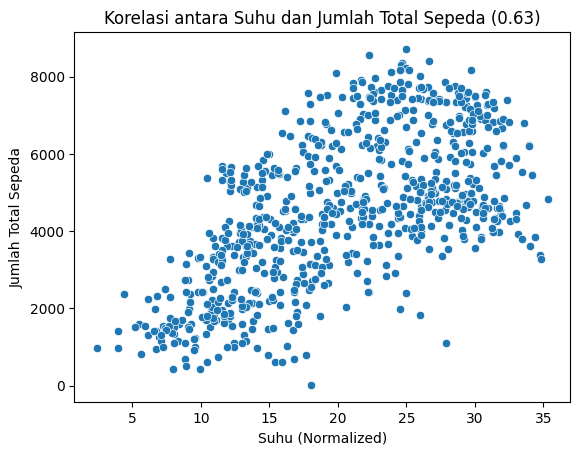

Terdapat hubungan positif antara suhu dan jumlah total sepeda.


In [27]:
# Korelasi antara suhu dan jumlah total sepeda
correlation = data_day['temp'].corr(data_day['total_count'])

if correlation > 0:
    correlation_interpretation = "Terdapat hubungan positif antara suhu dan jumlah total sepeda."
elif correlation < 0:
    correlation_interpretation = "Terdapat hubungan negatif antara suhu dan jumlah total sepeda."
else:
    correlation_interpretation = "Tidak ada hubungan linear yang signifikan antara suhu dan jumlah total sepeda."


sns.scatterplot(x='temp', y='total_count', data=data_day)
plt.title(f'Korelasi antara Suhu dan Jumlah Total Sepeda ({correlation:.2f})')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Total Sepeda')
plt.show()
print(correlation_interpretation)

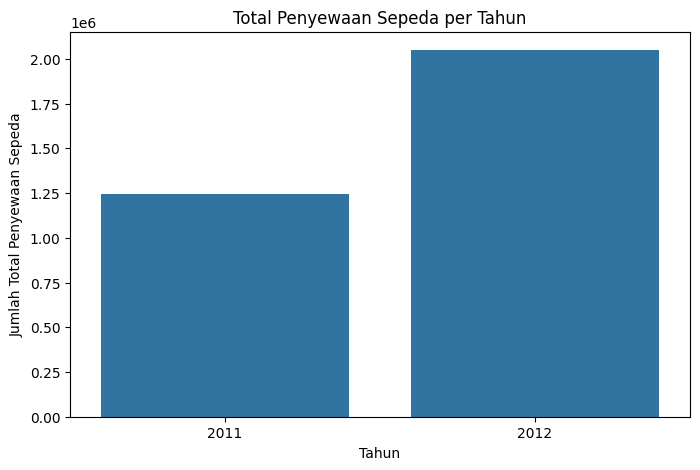

In [28]:
#Bagaimana pertumbuhan total penyewaan sepeda dari tahun ke tahun?
data_day['tanggal'] = pd.to_datetime(data_day['tanggal'])
data_day['tahun'] = data_day['tanggal'].dt.year
total_rentals_per_year = data_day.groupby('tahun')['total_count'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=total_rentals_per_year.index, y=total_rentals_per_year.values)
plt.title('Total Penyewaan Sepeda per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Total Penyewaan Sepeda')
plt.show()

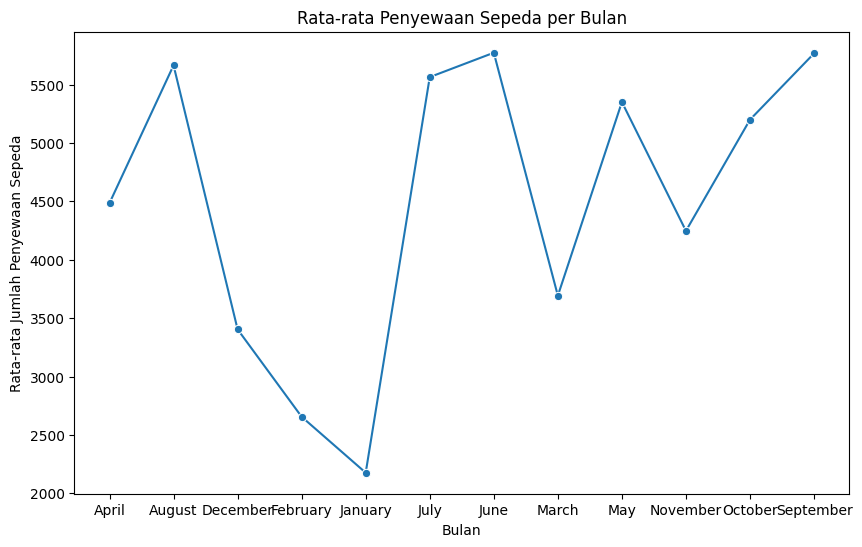

In [29]:
#Apakah ada bulan-bulan tertentu yang mengalami peningkatan atau penurunan signifikan dalam penyewaan?
data_day['bulan'] = data_day['tanggal'].dt.month_name()
monthly_rentals = data_day.groupby('bulan')['total_count'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_rentals.index, y=monthly_rentals.values, marker='o')
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

<ipython-input-30-9afccb9e4acd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = data_day.groupby('musim')['total_count'].mean().sort_values()


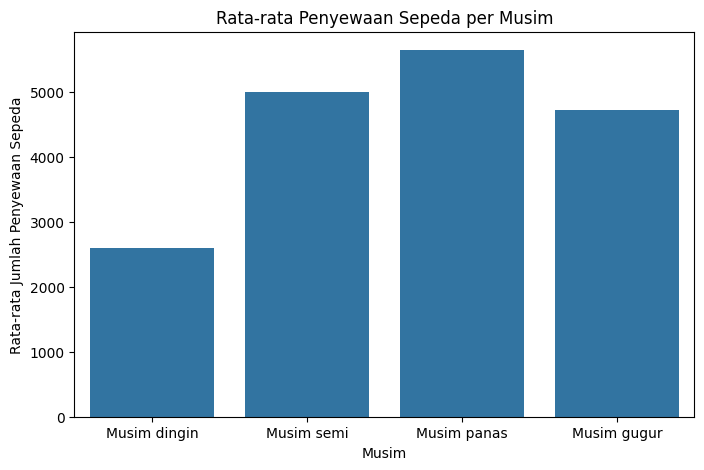

In [30]:
# Bagaimana tren penyewaan sepeda berubah di setiap musim?
seasonal_rentals = data_day.groupby('musim')['total_count'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_rentals.index, y=seasonal_rentals.values)
plt.title('Rata-rata Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

<ipython-input-53-82b060137a38>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_type_rentals = data_day.groupby('day_type')['total_count'].sum()


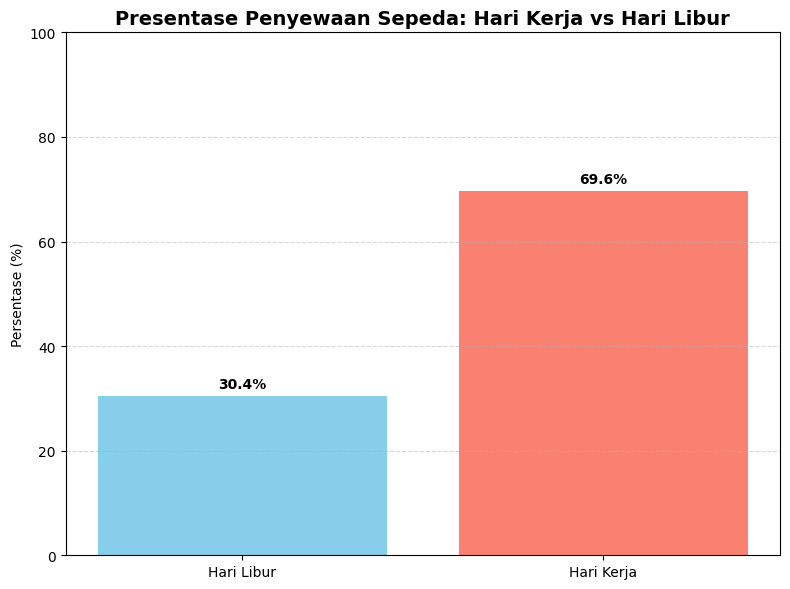

In [53]:
# berapa peresentasi penyewaan sepeda berbeda antara hari kerja dan hari libur?
data_day['day_type'] = data_day['workingday'].apply(lambda x: 'Hari Kerja' if x == 'Ya' else 'Hari Libur')

# Hitung total penyewaan per jenis hari
day_type_rentals = data_day.groupby('day_type')['total_count'].sum()

# Hitung persentasenya
day_type_percent = (day_type_rentals / day_type_rentals.sum()) * 100

# Plot bar chart presentase
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(day_type_percent.index, day_type_percent, color=['skyblue', 'salmon'])

# Tambahkan label persentase
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Tambahkan elemen visual
ax.set_title('Presentase Penyewaan Sepeda: Hari Kerja vs Hari Libur', fontsize=14, fontweight='bold')
ax.set_ylabel('Persentase (%)')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

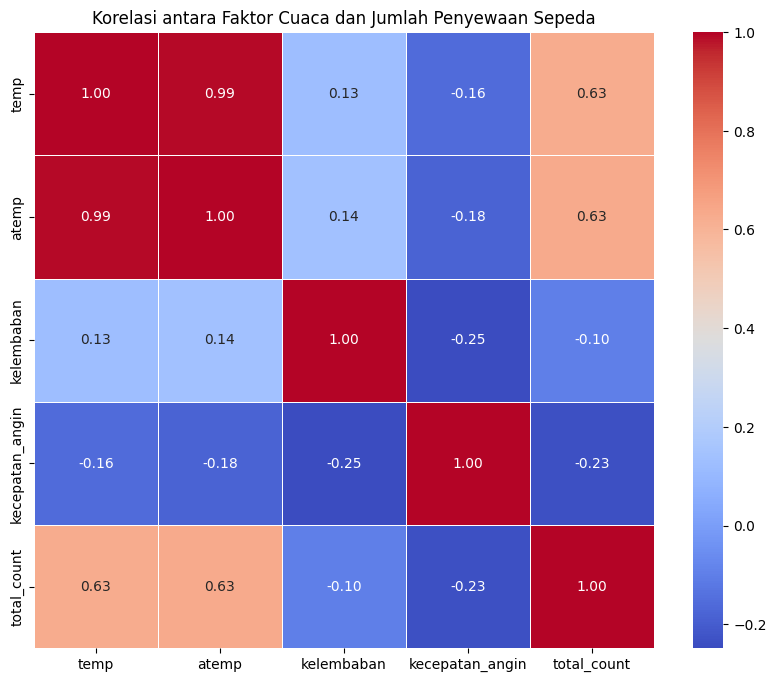

In [45]:
# Apakah kondisi cuaca memiliki dampak pada jumlah penyewaan?
correlation_weather_count = data_day[['temp', 'atemp', 'kelembaban', 'kecepatan_angin', 'total_count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_weather_count, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Penyewaan Sepeda')
plt.show()

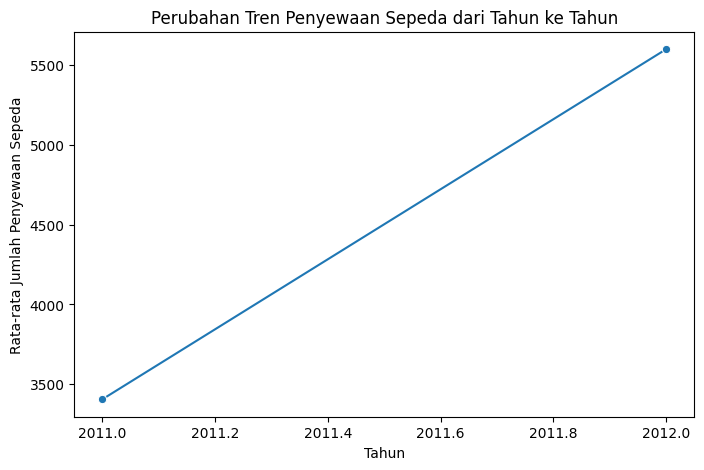

In [46]:
# Apakah ada perubahan tren signifikan dalam perilaku penyewaan dari tahun 2011 ke 2012?
trend_per_year = data_day.groupby('tahun')['total_count'].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(x=trend_per_year.index.astype(int), y=trend_per_year.values, marker='o')
plt.title('Perubahan Tren Penyewaan Sepeda dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()

### Pertanyaan 1:

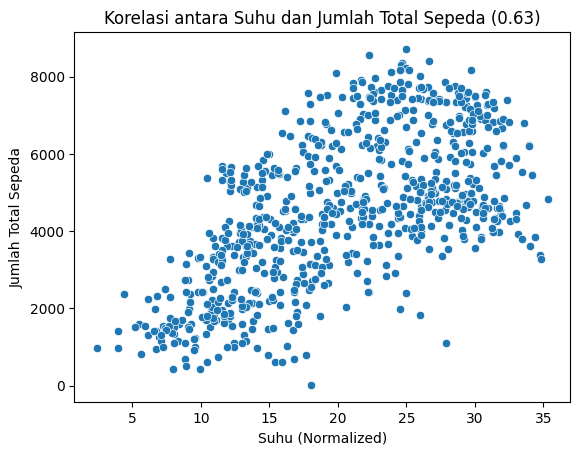

Terdapat hubungan positif antara suhu dan jumlah total sepeda.


In [47]:
# Apa korelasi antara suhu dan jumlah total sepeda yang disewa?
correlation = data_day['temp'].corr(data_day['total_count'])

# Interpretasi korelasi
if correlation > 0:
    correlation_interpretation = "Terdapat hubungan positif antara suhu dan jumlah total sepeda."
elif correlation < 0:
    correlation_interpretation = "Terdapat hubungan negatif antara suhu dan jumlah total sepeda."
else:
    correlation_interpretation = "Tidak ada hubungan linear yang signifikan antara suhu dan jumlah total sepeda."

# Visualisasi scatter plot
sns.scatterplot(x='temp', y='total_count', data=data_day)
plt.title(f'Korelasi antara Suhu dan Jumlah Total Sepeda ({correlation:.2f})')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Total Sepeda')
plt.show()

# Tampilkan kesimpulan
print(correlation_interpretation)

### Pertanyaan 2:

<ipython-input-54-6e1af09a0849>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_type_rentals = data_day.groupby('day_type')['total_count'].sum()


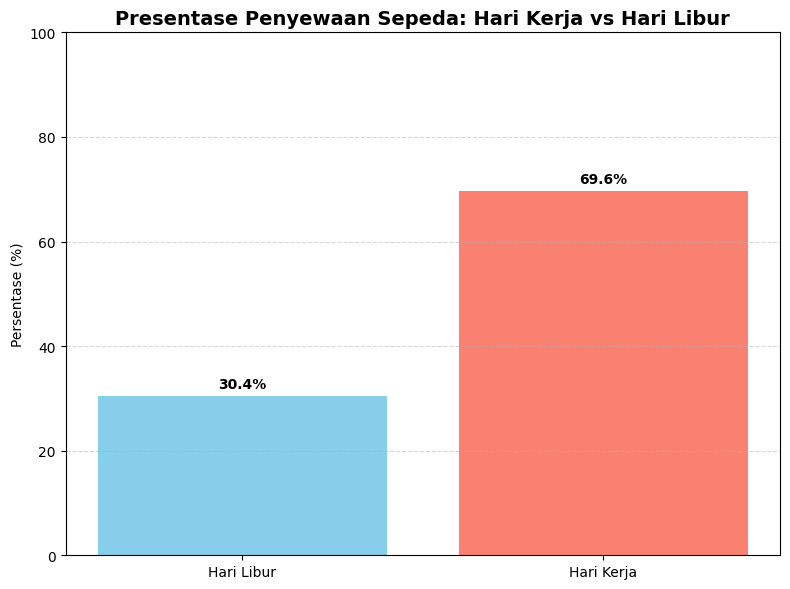

In [54]:
# berapa peresentasi penyewaan sepeda berbeda antara hari kerja dan hari libur?
# Buat kolom 'day_type' berdasarkan kolom 'workingday'
data_day['day_type'] = data_day['workingday'].apply(lambda x: 'Hari Kerja' if x == 'Ya' else 'Hari Libur')

# Hitung total penyewaan per jenis hari
day_type_rentals = data_day.groupby('day_type')['total_count'].sum()

# Hitung persentasenya
day_type_percent = (day_type_rentals / day_type_rentals.sum()) * 100

# Plot bar chart presentase
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(day_type_percent.index, day_type_percent, color=['skyblue', 'salmon'])

# Tambahkan label persentase
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Tambahkan elemen visual
ax.set_title('Presentase Penyewaan Sepeda: Hari Kerja vs Hari Libur', fontsize=14, fontweight='bold')
ax.set_ylabel('Persentase (%)')
ax.set_ylim(0, 100)
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## Conclusion

- Terdapat hubungan positif antara suhu dan jumlah total sepeda, informasi ini bisa berguna untuk pengelola sistem penyewaan sepeda. Mereka dapat mengoptimalkan strategi pemasaran atau menyesuaikan inventaris sepeda berdasarkan perubahan musim.
- Terdapat perbedaan yang signifikan dalam pola penyewaan sepeda antara hari kerja dan hari libur. Mayoritas penyewaan terjadi pada hari kerja, sedangkan penyewaan pada hari libur merupakan sebagian kecil dari total penyewaan sepeda. Ini mungkin disebabkan oleh aktivitas bersepeda yang lebih tinggi di hari kerja, saat orang-orang mungkin menggunakan sepeda untuk transportasi sehari-hari.